In [1]:
# import and init libraries

from pandas import DataFrame, read_csv

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# enable inline plotting
%matplotlib inline

#sns.set(style="white")

In [2]:
AFRINIC_RSYNC   = 'imc20/data/saddrs-by-day.alldata.afrinic.rsync.daily_count'
APNIC_RSYNC     = 'imc20/data/saddrs-by-day.alldata.apnic.rsync.daily_count'
CA_RG_NET_RSYNC = 'imc20/data/saddrs-by-day.alldata.ca.rg.net.rsync.daily_count'
_3PPS_RSYNC     = 'imc20/data/saddrs-by-day.alldata.3pps.rsync.daily_count'

afrinic_rsync   = pd.read_csv(AFRINIC_RSYNC,
                delim_whitespace=True,
                names=['Date', 'AFRINIC'],
                parse_dates=['Date'],
                index_col=0)
apnic_rsync     = pd.read_csv(APNIC_RSYNC,
                delim_whitespace=True,
                names=['Date', 'APNIC'],
                parse_dates=['Date'],
                index_col=0)
ca_rg_net_rsync = pd.read_csv(CA_RG_NET_RSYNC,
                delim_whitespace=True,
                names=['Date', 'Research PP'],
                parse_dates=['Date'],
                index_col=0)
_3pps_rsync     = pd.read_csv(_3PPS_RSYNC,
                delim_whitespace=True,
                names=['Date', 'aggregate'],
                parse_dates=['Date'],
                index_col=0)

In [3]:
AFRINIC_RRDP   = 'imc20/data//saddrs-by-day.alldata.afrinic.rrdp.daily_count'
APNIC_RRDP     = 'imc20/data/saddrs-by-day.alldata.apnic.rrdp.daily_count'
CA_RG_NET_RRDP = 'imc20/data/saddrs-by-day.alldata.ca.rg.net.rrdp.daily_count'
_3PPS_RRDP     = 'imc20/data/saddrs-by-day.alldata.3pps.rrdp.daily_count'

afrinic_rrdp   = pd.read_csv(AFRINIC_RRDP,
                delim_whitespace=True,
                names=['Date', 'AFRINIC'],
                parse_dates=['Date'],
                index_col=0)
apnic_rrdp     = pd.read_csv(APNIC_RRDP,
                delim_whitespace=True,
                names=['Date', 'APNIC'],
                parse_dates=['Date'],
                index_col=0)
ca_rg_net_rrdp = pd.read_csv(CA_RG_NET_RRDP,
                delim_whitespace=True,
                names=['Date', 'Research PP'],
                parse_dates=['Date'],
                index_col=0)
_3pps_rrdp     = pd.read_csv(_3PPS_RRDP,
                delim_whitespace=True,
                names=['Date', 'aggregate'],
                parse_dates=['Date'],
                index_col=0)

In [4]:
df_rsync = pd.concat([afrinic_rsync, apnic_rsync, ca_rg_net_rsync, _3pps_rsync], axis=1, sort=False)

# reindex, fill missing values with -1 (usually you can keep it at nan)
df_rsync.index = pd.to_datetime(df_rsync.index) # make sure you have timestamps
df_rsync = df_rsync.reindex( pd.date_range("2019-03-01", "2020-04-01", freq="D") )
# df_rsync = df_rsync.fillna(value=-1)

In [5]:
df_rrdp = pd.concat([afrinic_rrdp, apnic_rrdp, ca_rg_net_rrdp, _3pps_rrdp], axis=1, sort=False)

# reindex, fill missing values with -1 (usually you can keep it at nan)
df_rrdp.index = pd.to_datetime(df_rrdp.index) # make sure you have timestamps
df_rrdp = df_rrdp.reindex( pd.date_range("2019-03-01", "2020-04-01", freq="D") )
# df_rrdp = df_rrdp.fillna(value=-1)

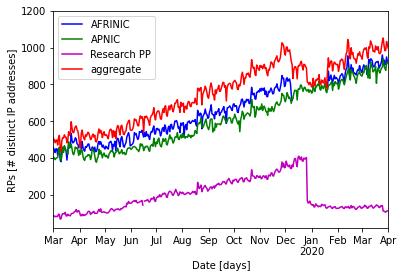

In [6]:
## plot rsync

ax = df_rsync.plot(color = ['b', 'g', 'm', 'r'])
ax.set_ylabel('RPs [# distinct IP addresses]')
ax.set_xlabel('Date [days]')
ax.grid(False)

#rsync.spines["top"].set_visible(False)
#rsync.spines["right"].set_visible(False)

plt.ylim(top=1200)

#plt.legend(ncol=2)
#plt.rc('axes', labelsize=12)
#plt.rc('legend', fontsize=12)
#plt.rc('xtick', labelsize=12)
#plt.rc('ytick', labelsize=12)

ax.tick_params(which='minor', bottom=False)

# save and explicitly close figure
fig = ax.get_figure()
fig.savefig("imc20/rp2pp-rsync.pdf", bbox_inches='tight') # tight removes whitespace borders

plt.show()
plt.close(fig)

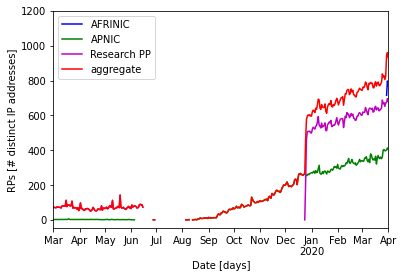

In [7]:
## plot RRDP

ax = df_rrdp.plot(color = ['b', 'g', 'm', 'r'])
ax.set_ylabel('RPs [# distinct IP addresses]')
ax.set_xlabel('Date [days]')#, labelsize=18)
ax.grid(False)

plt.ylim(top=1200)

ax.tick_params(which='minor', bottom=False)

# save and explicitly close figure
fig = ax.get_figure()
fig.savefig("imc20/rp2pp-rrdp.pdf", bbox_inches='tight') # tight removes whitespace borders

plt.show()
plt.close(fig)